In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [11]:
data_titanic = "./data_titanic.csv"
data_energy_nat = "./df_nat.csv"

# Titanic Dataset

## Import data

In [12]:
df_titanic = pd.read_csv(data_titanic)

In [13]:
df_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df_titanic.select_dtypes(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [16]:
df_titanic.select_dtypes(exclude=["object"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


## Visualize Data

### <font color='purple'> Quelle est la répartition des passagers par classe ? </font>
-> Single categorical variable (une seule variable qualitative nominale)

We choose a pie plot because we think it is a good way to show the distribution of population among classes.

Sharaf

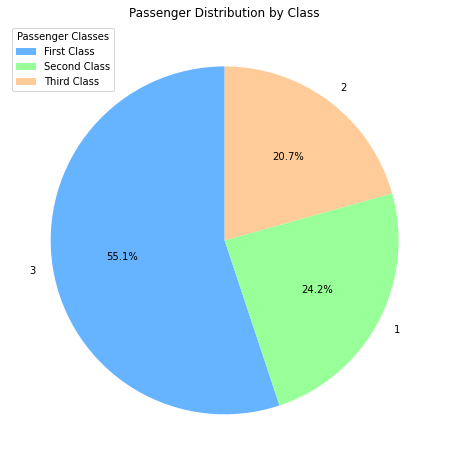

In [19]:
class_counts = df_titanic["Pclass"].value_counts()
# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    class_counts,
    labels=class_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#66b3ff", "#99ff99", "#ffcc99"],
)
plt.title("Passenger Distribution by Class")
# Adding legend
plt.legend(
    ["First Class", "Second Class", "Third Class"],
    title="Passenger Classes",
    loc="upper left",
)

plt.show()

### <font color='purple'> Quelle est la répartition des passagers par sexe ? </font>
-> type of variable(s)?

A pie plot seems just fine. The previous argument still holds.

Nicolas

In [ ]:
df_titanic["Sex"].value_counts().rename("Répartition par sexe").plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    figsize=(6, 6),
    cmap="tab20b",
    textprops={"color": "white", "weight": "bold", "size": 20},
)
plt.title("Titanic")
plt.legend()

### <font color='purple'>Distribution des passagers selon âge et sexe </font>
-> type of variable(s)?

Histograms with both gender where we use transparency.

Marcos

### <font color='purple'>Quel est le taux de survie selon le sexe ? l’âge ? la classe ? </font>
-> type of variable(s)?



Three differents graphs

Benjamin

### <font color='purple'> Y a-t-il un lien entre prix payé pour le billet et l’âge des passagers ? </font>
-> type of variable(s)?

Scatter

Sharaf

# Energy Dataset

## Import data

In [ ]:
Format = "%Y-%m-%d %H:%M:%S"
df_energy = pd.read_csv(data_energy_nat).dropna()
df_energy["DateTime"] = pd.to_datetime(df_energy["DateTime"], format=Format)
df_energy = df_energy.set_index(pd.DatetimeIndex(df_energy["DateTime"])).drop(
    labels="DateTime", axis=1
)

In [ ]:
df_energy.count()  # it is missing half data time

DateTime          245472
Consommation      122736
Fioul             122736
Charbon           122736
Gaz               122736
Nucléaire         122736
Eolien            122736
Solaire           122736
Hydraulique       122736
Pompage           122736
Bioénergies       122736
Ech. physiques    122736
dtype: int64

In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245472 entries, 0 to 245471
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DateTime        245472 non-null  object 
 1   Consommation    122736 non-null  float64
 2   Fioul           122736 non-null  float64
 3   Charbon         122736 non-null  float64
 4   Gaz             122736 non-null  float64
 5   Nucléaire       122736 non-null  float64
 6   Eolien          122736 non-null  float64
 7   Solaire         122736 non-null  float64
 8   Hydraulique     122736 non-null  float64
 9   Pompage         122736 non-null  float64
 10  Bioénergies     122736 non-null  float64
 11  Ech. physiques  122736 non-null  float64
dtypes: float64(11), object(1)
memory usage: 22.5+ MB


## Visualize Data

### <font color='purple'> Quels sont les types de variables ? Décrivez-les à l'aide d'un graphique. </font>

Une "DataTime" et des grandeurs numériques. Nous avons affaire à des séries temporelles.

plt.plot()

Nicolas

### <font color='purple'> Quelle est l'évolution de la consommation ? </font>

plt.plot(time, consommation)

Benj

### <font color='purple'> Quand a-t-on a un excédant / un déficit de production ? </font>

On calcule la différence Consommation - production et on trace la courbe en fonction du temps

Marcos

### <font color='purple'> Y a-t-il une corrélation entre les différents types de production ? </font>

sns.heatmap(df.corr())

Benj